In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('Churn_Modelling.csv')

In [20]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df_final = pd.get_dummies(df, drop_first=True)

In [21]:
X = df_final.drop('Exited', axis=1)
y = df_final['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #Bu ormanın içinde 100 tane ağaç olsun. 
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



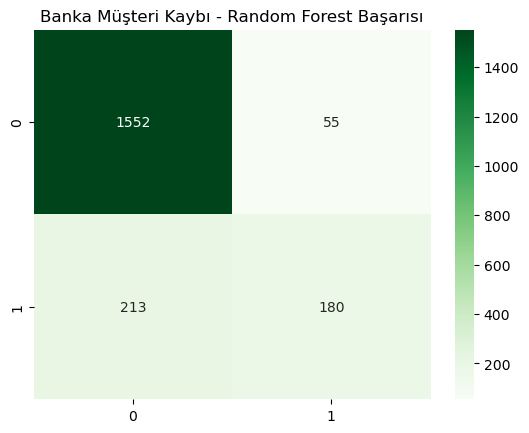

In [23]:
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Banka Müşteri Kaybı - Random Forest Başarısı')
plt.show()

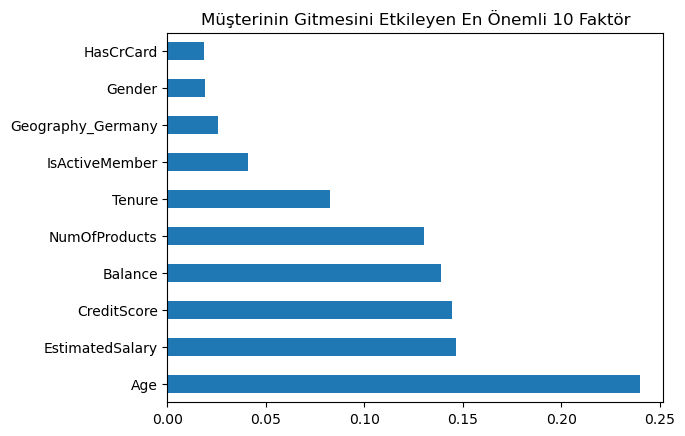

In [24]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Müşterinin Gitmesini Etkileyen En Önemli 10 Faktör')
plt.show()